# 🏦 BankTarget: Optimizing Marketing ROI through Predictive Analytics




### Business Case:
> * This project analyzes direct marketing campaigns of a Portuguese banking institution to predict customer behavior regarding term deposit subscriptions.
> * **Strategic Context:** Marketing costs are high and conversion rates are low. This project aims to reduce "Marketing Fatigue" by targeting only high-potential customers, thereby increasing ROI.
> * **Objective:** To build a robust machine learning model that provides actionable insights to the marketing department.
> * **Domain:** Finance / Banking.

## Business Problem

> * The bank conducts telemarketing campaigns to promote term deposits.
    Contacting all customers is expensive and inefficient.
    
> * Target Variable:
    y → yes (1) / no (0)
    
> * This is a Binary Classification problem.


### 🏦📊 Term Deposit Subscription Workflow for Portuguese Bank

1. **Data Collection**

   * Gather a comprehensive dataset consisting of direct phone call   marketing campaigns from 2008 to 2010.
   * Dataset includes customer demographic data, socio-economic indicators, and previous campaign history.
   

3. **Exploratory Data Analysis (EDA)**

 *  The goal is to analyze customer attributes and campaign patterns to identify key factors influencing term deposit subscriptions.

     1. **Univariate Analysis**
    * Analyzing the distribution of individual features like Age, Job, and the target variable 'y' to understand the data balance.
    
     2. **Bivariate & Multivariate Analysis**
    * Exploring relationships between customer demographics (like Job/Education) and subscription success to identify the most profitable segments.
    
     3. **Correlation & Statistical Insights**
    * Using heatmaps and statistical measures to find correlations between economic indicators (euribor3m) and customer behavior.
      
      
3. **Data Preprocessing & Cleaning**

    This phase involves preparing the raw data for machine learning models to ensure high accuracy and reliable predictions.
    
    * **Handling Missing Values:** Identifying and treating 'unknown' values in categorical columns like 'job', 'education', and 'poutcome'.
    * **Feature Encoding:** Converting categorical variables into numerical format using Label Encoding and One-Hot Encoding for model compatibility.
    * **Outlier Management:** Identifying and handling extreme values in 'balance' and 'duration' to prevent model bias.
    * **Feature Scaling:** Applying StandardScaler to normalize numerical features, which is essential for distance-based models like SVM and Logistic
        Regression.
    * **Feature Selection:** Dropping irrelevant columns or those that might lead to "Data Leakage" (like 'duration' for certain predictive scenarios).
      

4.  **Feature Engineering**

    Feature Engineering is the process of creating new features or transforming existing ones to improve the predictive power of our models.
    
    * **Age Binning:** Transforming the 'age' column into categorical groups (Young, Middle-aged, Senior) to capture life-stage-specific banking
       behaviors.
    * **Duration Transformation:** Converting call duration from seconds to minutes for better interpretability and identifying "High Engagement"
      thresholds.
    * **Economic Index Interaction:** Combining indicators like 'euribor3m' and 'consumer confidence' to create a "Market Sentiment" feature.
    * **Handling Class Imbalance (SMOTE):** Generating synthetic samples for the minority class ('yes') to ensure the model doesn't become biased
      towards 'no'.
      
      
5.  **Model Development & Evaluation**

    In this we implement and compare multiple classification algorithms to find the best predictor for customer subscriptions.
    
    ### Models Used:
    1. **Logistic Regression:** Baseline model for binary classification.
    2. **Decision Tree Classifier:** To visualize and understand customer decision rules.
    3. **Random Forest Classifier:** Ensemble method for high accuracy and stability.
    4. **Support Vector Machine (SVM):** To handle non-linear patterns and complex decision boundaries.
    
    ### Evaluation Metrics:
    * **Accuracy Score:** Overall performance of the model.
    * **Confusion Matrix:** To track True Positives (correctly predicted 'yes') and True Negatives.
    * **Classification Report:** Detailed analysis of Precision, Recall, and F1-Score.
      

6.  **Hyperparameter Tuning**

    Instead of using default settings, we optimize each model's parameters to achieve the highest possible performance and prevent over-fitting.
    
    * **Methodology:** Used **GridSearchCV** or **RandomizedSearchCV** to systematically test combinations of parameters.
    * **Optimization Goals:** * **Random Forest:** Tuning `n_estimators` (number of trees) and `max_depth` to balance complexity.
      

7.  **Model Deployment**

    The final model is deployed to bridge the gap between data insights and business action.

   * The best-performing model (Random Forest) is saved as a `.pkl` file using **Pickle**.


## _📦 Import Libraries_


In [17]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


## Domain Analysis

In [27]:
#Load the Dataset

In [29]:
df = pd.read_csv("bank-full.csv",sep=';')

In [31]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


#### Drop Unnecessary Columns
> which is not giving us much information

In [65]:
# Drop Out duration column which not give useful information
df.drop(columns=['duration'], errors='ignore', inplace=True)



## Basic Data Checks

In [80]:
# Check frist five rows
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no


In [82]:
# check last five rows
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,2,188,11,other,no


In [84]:
# Check rows and columns
df.shape

(45211, 16)

In [116]:
# Checking Null Values
df.isnull().sum() 

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [118]:
# check c olumns 
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous',
       'poutcome', 'y'],
      dtype='object')

In [120]:
# check information about datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  campaign   45211 non-null  int64 
 12  pdays      45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  poutcome   45211 non-null  object
 15  y          45211 non-null  object
dtypes: int64(6), object(10)
memory usage: 5.5+ MB


In [122]:
# Check basic statistics of the dataset categorical columns
# This helps understand data distribution, central tendency, and spread
df.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [124]:
# Check basic statistics of the dataset categorical columns
# This helps understand data distribution, central tendency, and spread
df.describe()

,age,balance,day,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


In [126]:
#check duplicate data
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Length: 45211, dtype: bool

## 📊 Exploratory Data Analysis

#### EDA is the process of analyzing datasets to:

* Summarize their main features

* Spot patterns, trends, and relationships

* Identify anomalies or missing values

* Check assumptions for modeling

* Visualize the data for better understanding

## Univariate Analysis

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt
df['y'].value_counts()


y
no     39922
yes     5289
Name: count, dtype: int64

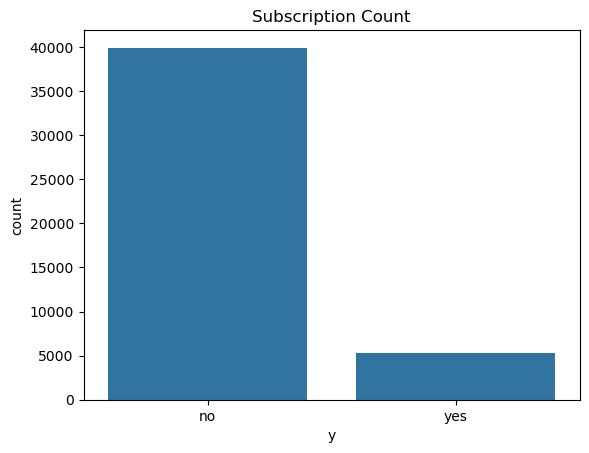

In [140]:
sns.countplot(x='y', data=df)
plt.title("Subscription Count")
plt.show()

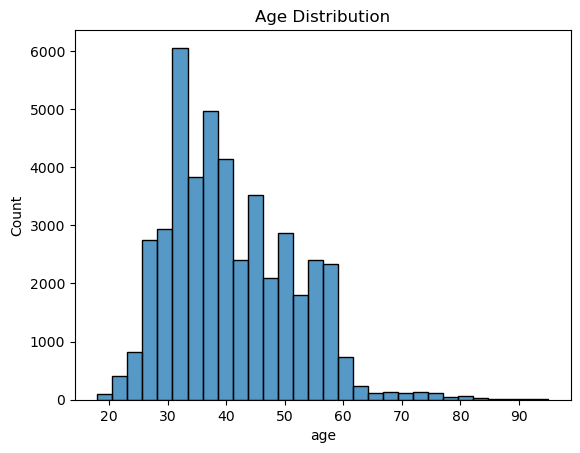

In [146]:
sns.histplot(df['age'], bins=30)
plt.title("Age Distribution")
plt.show()


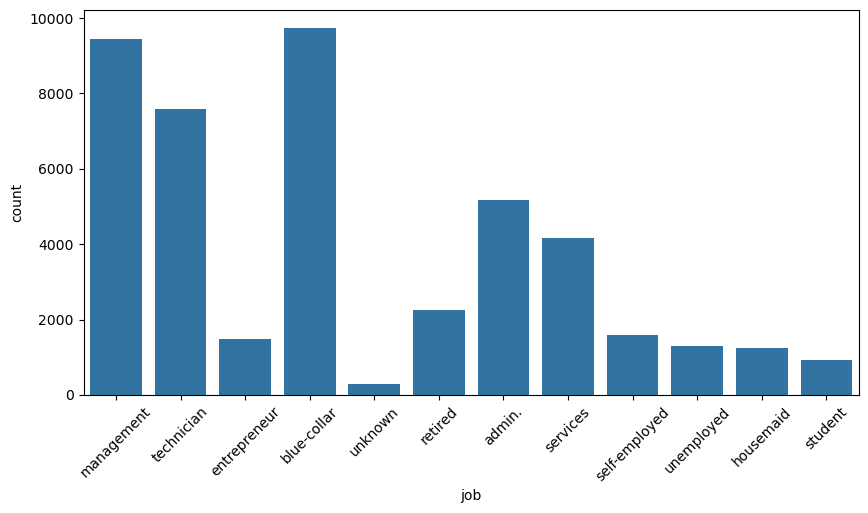

In [148]:
plt.figure(figsize=(10,5))
sns.countplot(x='job', data=df)
plt.xticks(rotation=45)
plt.show()


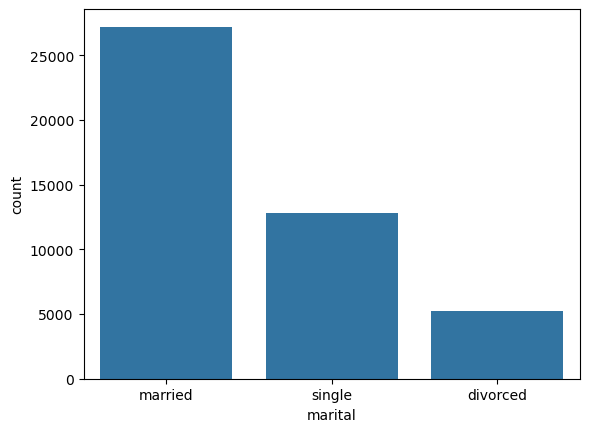

In [164]:
sns.countplot(x='marital', data=df)
plt.show()


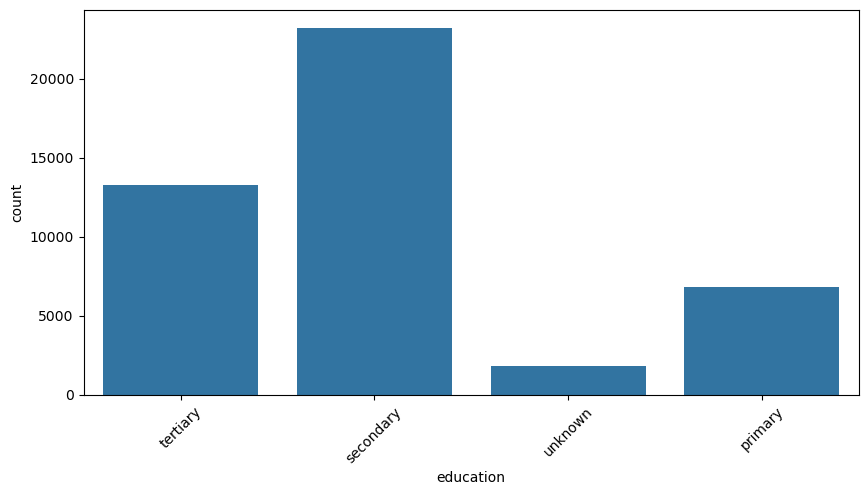

In [166]:
plt.figure(figsize=(10,5))
sns.countplot(x='education', data=df)
plt.xticks(rotation=45)
plt.show()


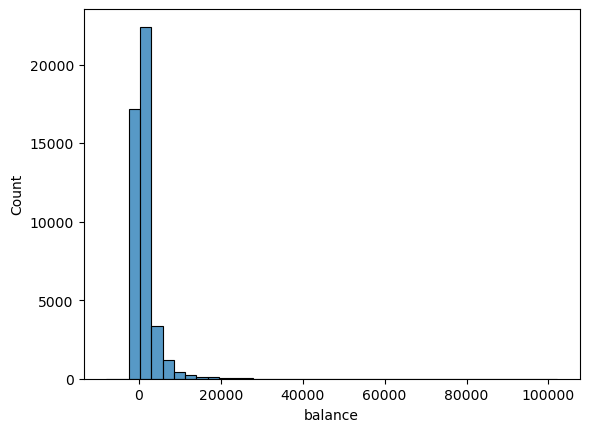

In [178]:
sns.histplot(df['balance'], bins=40)
plt.show()


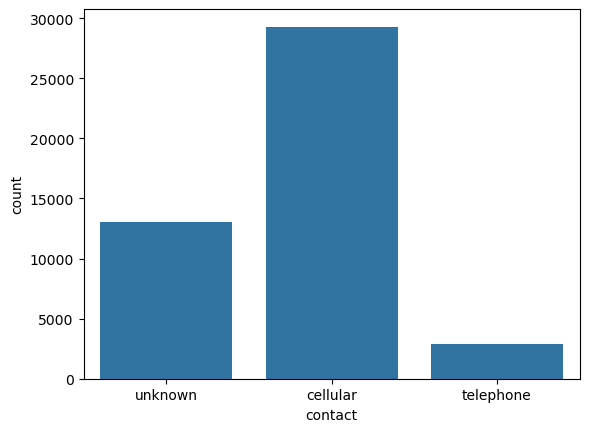

In [170]:
sns.countplot(x='contact', data=df)
plt.show()


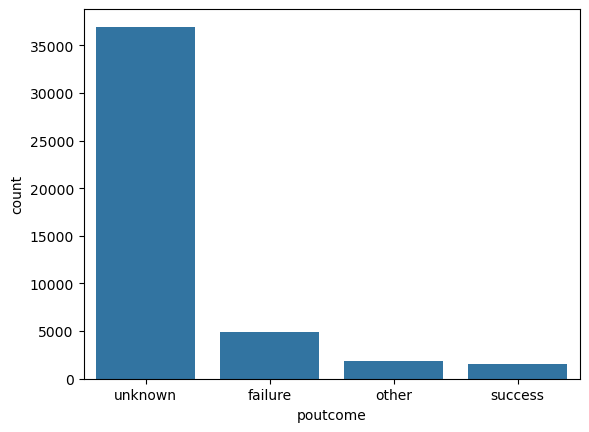

In [172]:
sns.countplot(x='poutcome', data=df)
plt.show()
